In [1]:
from Data import Mgdraw

In [2]:
"""
Function which returns mgdraw data as a list of trajectories.
Each trajectory in trajs is a list of points
"""
def get_mgdraw(infile, seg_amt=1000, particle_type=None):
    particle_types = {}
    mgdraw_reader = Mgdraw(filename=infile)
    trajs = []
    current_traj = []
    last = (-100, -100, -100)
    for i in range(seg_amt):
        # Hold new event data
        res=mgdraw_reader.readEvent()
        if res==0: # Track data
            particle_code = mgdraw_reader.jtrack
            if particle_type!=None and particle_code!=particle_type: continue # Wrong particle
            # Current segment
            seg = []
            for i in range(mgdraw_reader.ntrack):
                seg.append(mgdraw_reader.data[3*i:3*i+3]) # x-y-z
            
            # Count particle types
            if particle_code not in particle_types.keys():
                particle_types[particle_code] = 0
            particle_types[particle_code] += 1
            
            # Seg is part of a new trajectory.
            if last[0] != -100 and last != seg[0]:
                trajs.append([seg for seg in current_traj+[last]])
                current_traj = []
                last = (-100, -100, -100)

            for point in seg:
                current_traj.append(point)
            # Used to check for track data continuity
            last = mgdraw_reader.data[3*mgdraw_reader.ntrack:3*mgdraw_reader.ntrack+3]
    trajs.append(current_traj)
    mgdraw_reader.close()
    return trajs

"""
Same as get_mgdraw but 
"""
def gen_get_mgdraw(infile, seg_amt=1000, particle_type=None):
    particle_types = {}
    mgdraw_reader = Mgdraw(filename=infile)
    current_traj = []
    last = (-100, -100, -100)
    for i in range(seg_amt):
        # Hold new event data
        res=mgdraw_reader.readEvent()
        if res==0: # Track data
            particle_code = mgdraw_reader.jtrack
            if particle_type!=None and particle_code!=particle_type: continue # Wrong particle
            # Current segment
            seg = []
            for i in range(mgdraw_reader.ntrack):
                seg.append(mgdraw_reader.data[3*i:3*i+3]) # x-y-z
            
            # Count particle types
            if particle_code not in particle_types.keys():
                particle_types[particle_code] = 0
            particle_types[particle_code] += 1
            
            # Seg is part of a new trajectory.
            if last[0] != -100 and last != seg[0]:
                yield [seg for seg in current_traj+[last]]
                current_traj = []
                last = (-100, -100, -100)

            for point in seg:
                current_traj.append(point)
            # Used to check for track data continuity
            last = mgdraw_reader.data[3*mgdraw_reader.ntrack:3*mgdraw_reader.ntrack+3]
    mgdraw_reader.close()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
infile="detector_electrons_ce_ca_nm/events"
particle_code = 3

gen_trajs = gen_get_mgdraw(infile, seg_amt=10000000, particle_type=particle_code)
num_trajs = 0

In [18]:
# Get plot ranges
maxZ=-10000
minZ=10000
maxX=-10000
minX=10000
maxY=-10000
minY=10000
while True:
    try:
        traj = next(gen_trajs)
        arr_traj = np.asarray(traj)
        maxX = max(np.max(arr_traj[:,0]), maxX)
        minX = min(np.min(arr_traj[:,0]), minX)
        maxY = max(np.max(arr_traj[:,1]), maxY)
        minY = min(np.min(arr_traj[:,1]), minY)
        maxZ = max(np.max(arr_traj[:,2]), maxZ)
        minZ = min(np.min(arr_traj[:,2]), minZ)
        num_trajs += 1
    except StopIteration:
        break

In [19]:
num_trajs

20161

In [20]:
print(maxX)
print(minX)
print(maxY)
print(minY)
print(maxZ)
print(minZ)

9.999992370605469
-9.993762969970703
9.995387077331543
-9.999991416931152
95.0
0.0


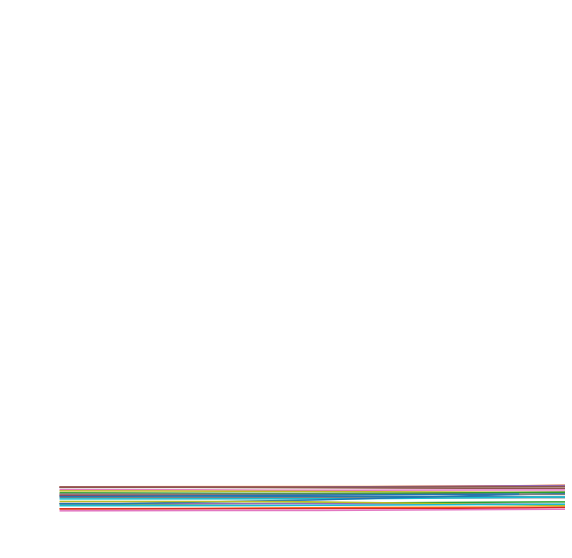

In [21]:
trajs = get_mgdraw(infile, seg_amt=10000, particle_type=particle_code)
# All plot
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.xlim([min(minZ, minX), max(maxZ, maxX)])
plt.ylim([min(minZ, minX), max(maxZ, maxX)])
for traj in trajs:
    arr_traj = np.asarray(traj)
    plt.plot(arr_traj[:,2], arr_traj[:,1])
plt.savefig(infile[:-7]+"/all_plots")

In [22]:
trajs=[]

In [1]:
# Save single plots
i=0

gen_trajs = gen_get_mgdraw(infile, seg_amt=10000000, particle_type=particle_code)

while True:
    try:
        traj = next(gen_trajs)
        if i%1000==0: print("\n"+str(i), end=": ")
        if i%100==0: print("#", end="")
        # Plot settings
        plt.figure(figsize=(10, 10))
        plt.axis("off")
        plt.ylim([min(minX, minZ), max(maxX, maxZ)])
        plt.xlim([min(minX, minZ), max(maxX, maxZ)])
        # Plot trajectory
        arr_traj = np.asarray(traj)
        plt.plot(arr_traj[:,2], arr_traj[:, 0])
        # Save 
        plt.savefig(infile[:-7]+"/plots/"+str(i))
        i+=1
        plt.clf()
        plt.close()
    except StopIteration:
        break
    

NameError: name 'gen_get_mgdraw' is not defined